# Find Clusters

Use case:
- Find the topics in texts
- Summarize a book using a LLM, avoid runing model queries on overlapping clusters.

### Generate Clusters

- n_samples: Total number of data points
- n_features: Number of features (dimensions) for each data point
- centers: Number of clusters, or the fixed center points for each cluster
- cluster_std: Standard deviation of the clusters

In [12]:
from sklearn.datasets import make_blobs

points, labels = make_blobs(n_samples=10000, centers=5, n_features=1536, random_state=0)

In [15]:
print(points[0])

[-1.15132344  2.69197408  2.64289373 ... -8.02313481 -0.07196159
  3.67443068]


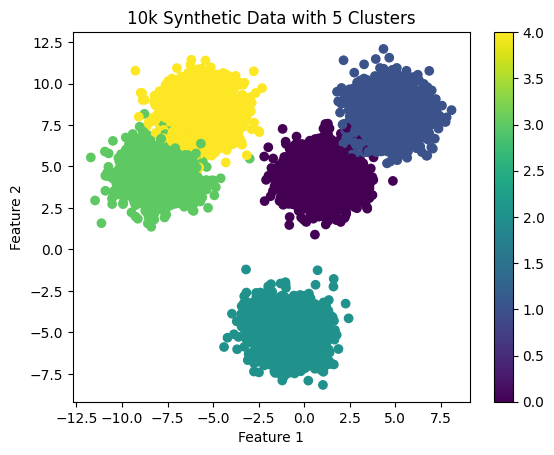

In [13]:
import matplotlib.pyplot as plt

plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('10k Synthetic Data with 5 Clusters')
plt.colorbar()
plt.show()

# Find the optmial k

**KMeans** takes an input of number of clusters (k), it will: 
-find the centers of the clusters
-label the data points by the cluster id.

**silhouette_score** is used to calculate the optimal k. The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the points are placed in the correct cluster.

However finding the k is computation expensive. As we can see below it took 37 seconds to run 10 times for 10k points of 1536 dimensions.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(points)
  labels = kmeans.labels_
  sil.append(silhouette_score(points, labels, metric = 'euclidean'))

print(sil)
sil_array = np.array(sil)
index_of_max = np.argmax(sil_array) + 2
print(index_of_max)


/Users/guanghuihe/Documents/projects/ai_engineering_practice/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanghuihe/Documents/projects/ai_engineering_practice/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/guanghuihe/Documents/projects/ai_engineering_practice/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanghuihe/Documents/projects/ai_engineering_practice/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value 

[0.3405483055245875, 0.5021129197138859, 0.6641001967268589, 0.8262613981098852, 0.6611041213848593, 0.49633396111227973, 0.33080318917735624, 0.16600684192158427, 0.0009315121085541827]
5


In [16]:
from sklearn.cluster import KMeans

# Number of clusters you want to find
num_clusters = index_of_max

# Create a KMeans instance with the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters).fit(points)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the labels for each data point indicating the cluster it belongs to
labels = kmeans.labels_

print("Cluster Centers:")
print(cluster_centers)
print("Cluster Labels:")
print(labels)

/Users/guanghuihe/Documents/projects/ai_engineering_practice/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
[[-0.90806465 -4.95646785  7.81765429 ... -3.74719179  8.45252563
   9.208714  ]
 [ 0.98612836  4.29352682  2.07149995 ... -8.50639412 -0.18816508
   4.3468632 ]
 [-8.02260222  4.68945665  3.14751802 ... -6.53669641  8.38641307
  -2.88679426]
 [-5.65231669  8.27683132  9.40891777 ...  2.57249627 -8.77045889
  -0.49213963]
 [ 4.77270666  8.12253493  6.00542845 ... -1.82926101 -8.17959642
   1.01023137]]
Cluster Labels:
[1 2 0 ... 1 1 3]


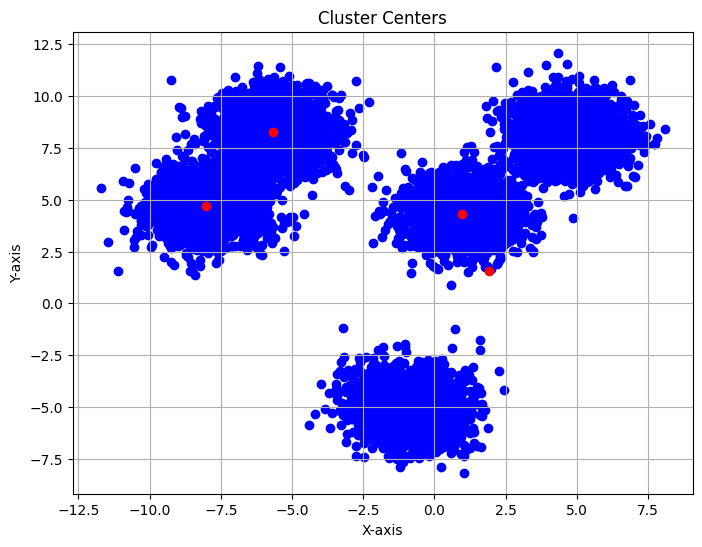

In [19]:
def plot(points, cluster_centers):
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], color='blue', label="Points")
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', label="Cluster Centers")
    plt.title("Cluster Centers")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

plot(points, cluster_centers)

### The importance of an optimal k

If we force the k=4 on the above data. The lower right red dot is trying to represent cluster on the top right and bottom. The blue dot near the red dot is not representative and is just a corner case. 

The meaning of this blue dot together with the count of the cluster can be very misleading to the analysis.

/Users/guanghuihe/Documents/projects/ai_engineering_practice/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


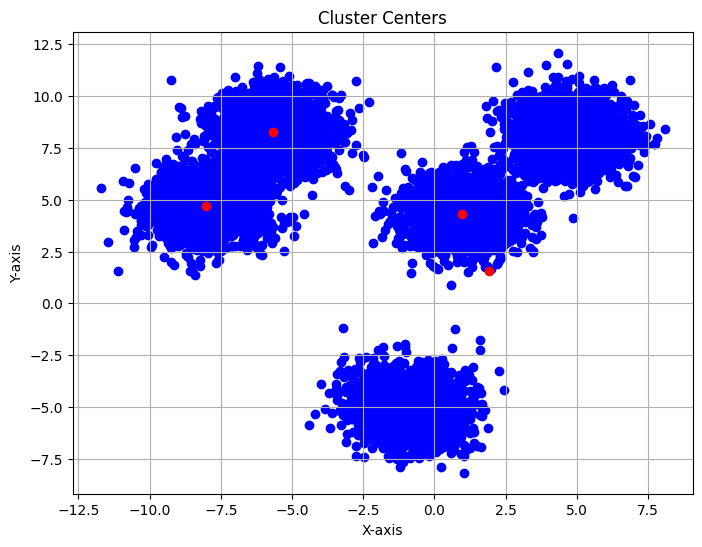

In [21]:
kmeans = KMeans(n_clusters=4).fit(points)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

plot(points, cluster_centers)